In [ ]:
#bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets, model_selection, linear_model, compose, decomposition, preprocessing

from pydataset import data


In [295]:
#Dataset carregado do sklearn, já vem bem pré-processados
X, y = sklearn.datasets.fetch_california_housing(return_X_y = True, as_frame= True)

#Garanti a padronização - Média 0 e std 1 
X_scale = sklearn.preprocessing.StandardScaler().fit_transform(X)

#Divisão de 80% do dataset para treino e 20% para teste
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scale, y, random_state=42, test_size=0.2)

#implementação de modelo de regressão linear
lin_reg = sklearn.linear_model.LinearRegression()


(16512, 8) (4128, 8)


In [ ]:
lin_reg.fit(X_train, y_train) #Modelos apenas fazem fit, que significa aprender novas medidas

y_test = y_test.to_numpy().reshape(-1,1) # necessario que o array esteja em 2 dimensoes para o predict funcionar
predicao = lin_reg.predict(X_test) #O método predict() permite o modelo criar outputs do X teste baseado no que aprendeu com o fit

sklearn.metrics.mean_squared_error(y_test, predicao) #medida que trata da soma dos quadrados da distancia dos pontos para a linha de regresão 


0.5558915986952442

In [297]:
pca = sklearn.decomposition.PCA(0.99) #modelo de PCA configurado para manter 99% de variancia original
pcs = pca.fit_transform(X_train) #Execução do PCA na parcela de treino
pc_test = pca.transform(X_test) #Nunca se usa fit no teste, para não estudar as caracteristicas do teste e enviesar o resultado com uma efetividade muito maior

lin_reg.fit(pcs, y_train) #novo apredizado do modelo, agora baseado nos valores de componentes principais

pc_predicao = lin_reg.predict(pc_test) #novas prediçoes 

sklearn.metrics.mean_squared_error(y_test, pc_predicao) #nova medida de distancia para avaliar a qualidade do modelo

0.5749242784363574

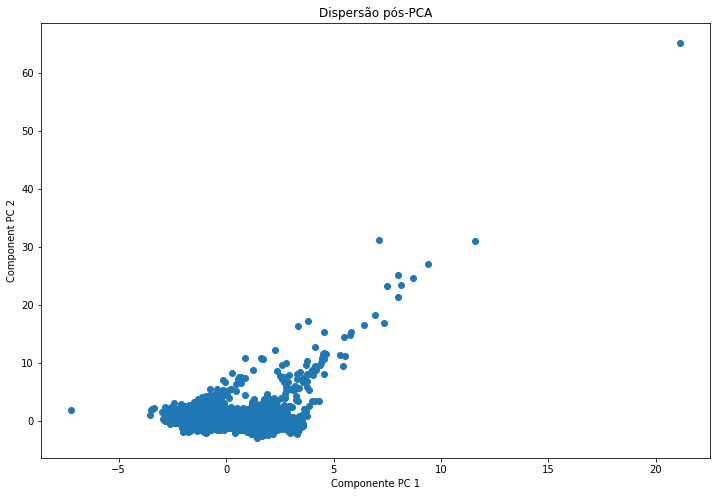

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(pcs[:,0], pcs[:,1])
plt.xlabel("Componente PC 1")
plt.ylabel("Component PC 2")
plt.title("Dispersão pós-PCA")
plt.show()

In [300]:
print(pca.explained_variance_ratio_)
print(pcs.shape, X.shape)
#para manter 99% de variabilidade, temos apenas uma coluna a menos

[0.24762779 0.21503668 0.16274598 0.15012412 0.126751   0.08245278
 0.0096085 ]
(16512, 7) (20640, 8)


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10c374a7d0>,
      dtype=object)

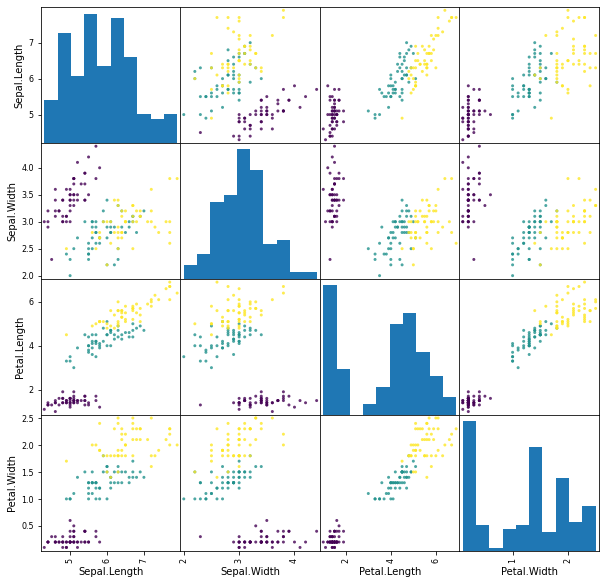

In [303]:
#carregamento da biblioteca iris do R 
iris = data("iris")
#abreviação das duas funções, label encoder vai dar um número para cada categoria
hot = sklearn.preprocessing.OneHotEncoder()
#one hot encoder vai transformar este número em uma combinação de 0s e 1s, e a posição do indicando qual caracteristica se trata, e a dos 0s para qual não se trata
lab = sklearn.preprocessing.LabelEncoder()

target = iris['Species'].values
target = lab.fit_transform(target)
target = target.reshape(-1,1)
hot.fit_transform(target)

#matriz de cada feature entre si e seu histograma
pd.plotting.scatter_matrix(iris, alpha= 0.8, c = target, figsize = (10,10))


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


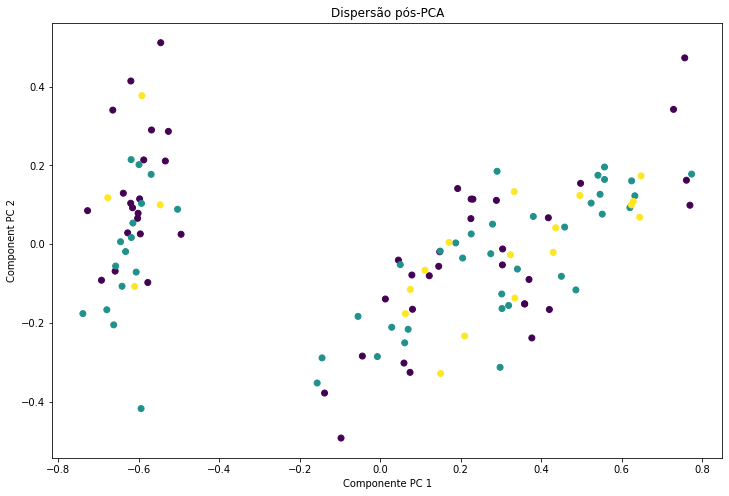

(120, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10c7357890>,
      dtype=object)

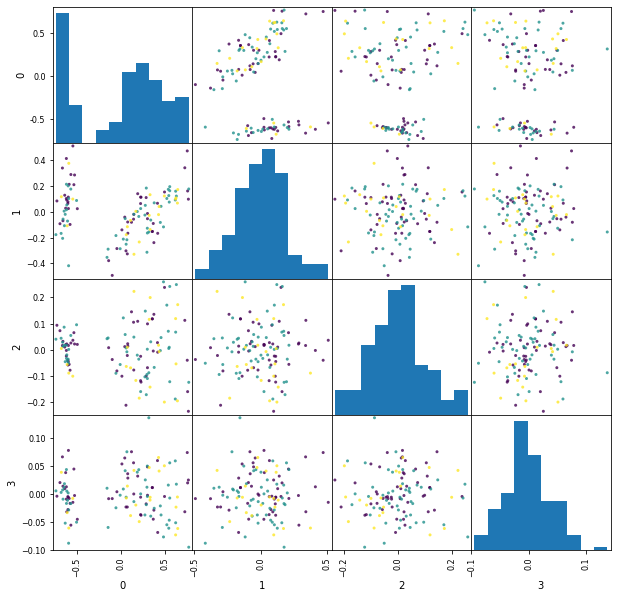

In [292]:
#A matriz do PCA não evidenciou nenhuma diferenciação entre os grupos, infelizmente :(

print(iris.head())
features = ["Sepal.Length", "Sepal.Width", 'Petal.Length', 'Petal.Width']
X = iris[features].values
#Normalização- variando de 0 a 1 
X_scale = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scale, target, random_state=42, test_size=0.2)

pca = sklearn.decomposition.PCA(n_components=4) 

pcs = pca.fit_transform(X_train)

pcs = pd.DataFrame(pcs)
print(pcs.shape)
pd.plotting.scatter_matrix(pcs, alpha= 0.8, c=target[0:120,:],figsize = (10,10))


